In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [2]:
da1 = pd.read_csv("/Users/divyeshbhatt/Downloads/Datas/Classification/Diabetes/diabetes 11.04.25 AM.csv")

In [3]:
da1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
da1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
da1.shape

(768, 9)

In [6]:
da1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
da1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
da1.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

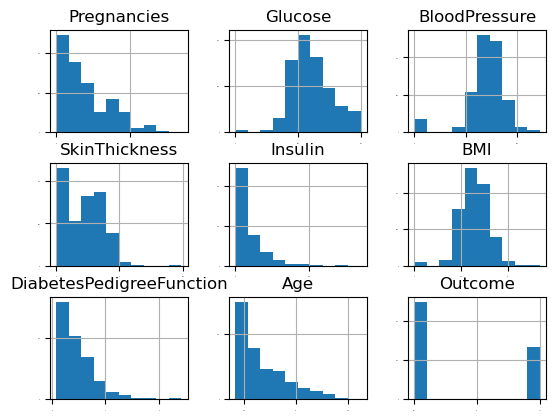

In [9]:
da1.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)
plt.show()

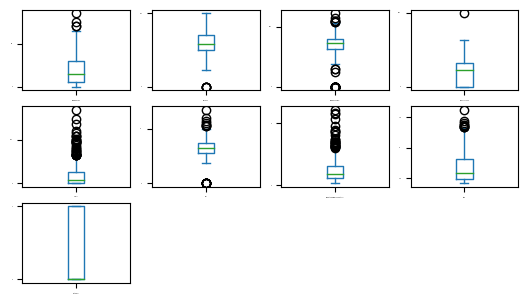

In [10]:
da1.plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False, fontsize = 1)
plt.show()

In [11]:
X = da1.drop('Outcome', axis = 1)
y = da1['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [12]:
mod1 = []
mod1.append(('LR', LogisticRegression()))
mod1.append(('LDA', LinearDiscriminantAnalysis()))
mod1.append(('CART', DecisionTreeClassifier()))
mod1.append(('NB', GaussianNB()))
mod1.append(('SVC', SVC()))
mod1.append(('KNN', KNeighborsClassifier()))

result1 = []
nms1 = []
for name, model in mod1:
    kf1 = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv_r1 = cross_val_score(model, X_train, y_train, cv = kf1, scoring = 'accuracy')
    result1.append(cv_r1)
    nms1.append(name)
    ms1 = (name, cv_r1.mean(), cv_r1.std())
    print(ms1)

('LR', 0.7605235325224748, 0.036706035019966055)
('LDA', 0.7604970914859862, 0.03625543398414691)
('CART', 0.7196985721840296, 0.02769941831658144)
('NB', 0.7361713379164463, 0.029767205674033976)
('SVC', 0.7556054997355897, 0.032335355298910635)
('KNN', 0.7199101004759387, 0.03653976176679923)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

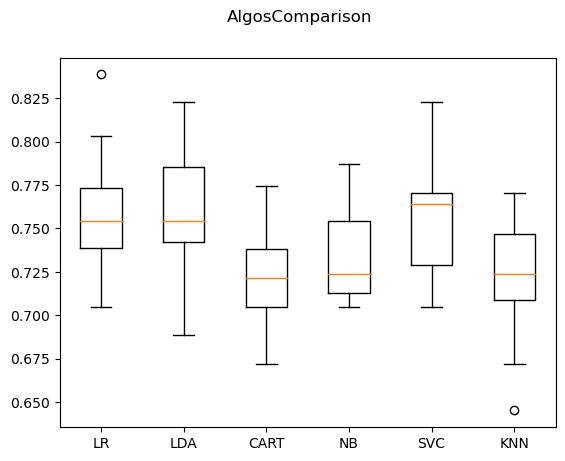

In [13]:
#viz
fig = plt.figure()
fig.suptitle('AlgosComparison')
ax = fig.add_subplot(111)
plt.boxplot(result1)
ax.set_xticklabels(nms1)
plt.show()

In [14]:
#norm

pipes = []
pipes.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipes.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipes.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipes.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipes.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipes.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

res = []
nms = []
for name, model in pipes:
    kf1 = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv_r = cross_val_score(model, X_train, y_train, cv = kf1, scoring = 'accuracy')
    res.append(cv_r)
    nms.append(name)
    ms_1 = (name, cv_r.mean(), cv_r.std())
    print(ms_1)

('ScaledLR', 0.7588841882601798, 0.03738643816035462)
('ScaledLDA', 0.7604970914859862, 0.03625543398414691)
('ScaledCART', 0.7180592279217346, 0.036429194996818126)
('ScaledNB', 0.7361713379164463, 0.029767205674033976)
('ScaledKNN', 0.739476467477525, 0.05137460729581701)
('ScaledSVM', 0.7671337916446325, 0.027903262262135253)


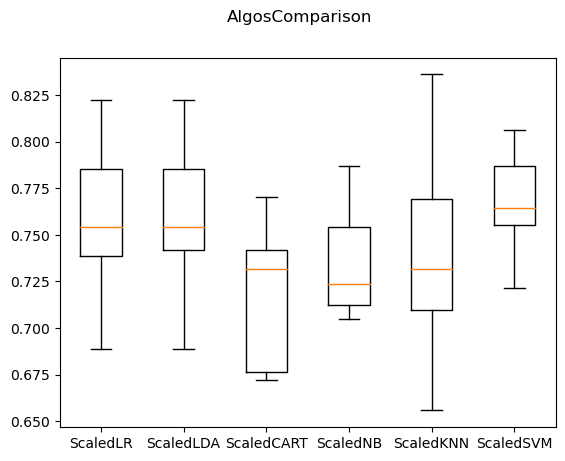

In [15]:
#viz
fig = plt.figure()
fig.suptitle('AlgosComparison')
ax = fig.add_subplot(111)
plt.boxplot(res)
ax.set_xticklabels(nms)
plt.show()

In [16]:
#SVM

scaler = StandardScaler().fit(X_train)
resc_X = scaler.transform(X_train)
c_vals = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]
kern_val = ['linear', 'poly', 'rbf', 'sigmoid']
par_grid = dict(C = c_vals, kernel = kern_val)
mod = SVC()
kf1 = KFold(n_splits = 10, random_state = 42, shuffle = True)
gr1 = GridSearchCV(estimator = mod, param_grid = par_grid, scoring = 'accuracy', cv = kf1)
gr1_r = gr1.fit(resc_X, y_train)
print(gr1_r.best_score_, gr1_r.best_params_)
means = gr1_r.cv_results_['mean_test_score']
stds = gr1_r.cv_results_['std_test_score']
params = gr1_r.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(mean, stdev, param)

0.765520888418826 {'C': 1.1, 'kernel': 'rbf'}
0.7637757800105763 0.029872801715990133 {'C': 0.1, 'kernel': 'linear'}
0.7116869381279747 0.045955129952600246 {'C': 0.1, 'kernel': 'poly'}
0.7361448968799577 0.03977499201657454 {'C': 0.1, 'kernel': 'rbf'}
0.7588313061872025 0.033289978986524055 {'C': 0.1, 'kernel': 'sigmoid'}
0.7637757800105763 0.024972771598901114 {'C': 0.3, 'kernel': 'linear'}
0.7411422527763089 0.03378622357825685 {'C': 0.3, 'kernel': 'poly'}
0.7654680063458488 0.02943898028701734 {'C': 0.3, 'kernel': 'rbf'}
0.7278424114225277 0.043645502197129 {'C': 0.3, 'kernel': 'sigmoid'}
0.765388683236383 0.027068196715517624 {'C': 0.5, 'kernel': 'linear'}
0.7378635642517186 0.02374405076679004 {'C': 0.5, 'kernel': 'poly'}
0.7574034902168164 0.023927384961101097 {'C': 0.5, 'kernel': 'rbf'}
0.7050502379693283 0.04790503630531807 {'C': 0.5, 'kernel': 'sigmoid'}
0.7637757800105763 0.029872801715990133 {'C': 0.7, 'kernel': 'linear'}
0.7395029085140137 0.023064648136809814 {'C': 0.7, '

In [17]:
#Ens

ens1 = []
ens1.append(('AB', AdaBoostClassifier()))
ens1.append(('GBM', GradientBoostingClassifier()))
ens1.append(('RF', RandomForestClassifier()))
ens1.append(('ET', ExtraTreesClassifier()))

res_new = []
nms_1 = []

for name, model in ens1:
    kf_1 = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv_e = cross_val_score(model, X_train, y_train, cv = kf_1, scoring = 'accuracy')
    res_new.append(cv_e)
    nms_1.append(name)
    ms_e = (name, cv_e.mean(), cv_e.std())
    print(ms_e)

('AB', 0.7638286620835537, 0.038646593764581245)
('GBM', 0.7753305129561079, 0.04047017227609257)
('RF', 0.7604970914859861, 0.03479077781174431)
('ET', 0.7703067160232681, 0.03972461934849333)


In [24]:
#Gradient

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}
gbm = GradientBoostingClassifier(random_state = 42)

gr_n = GridSearchCV(estimator = gbm, param_grid = param_grid, cv = 10, scoring = 'accuracy', n_jobs = -1)

gr_n.fit(X_train, y_train)
best_para = gr_n.best_params_
best_modgbm = gr_n.best_estimator_
print(gr_n.best_params_, gr_n.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8} GradientBoostingClassifier(min_samples_leaf=3, n_estimators=200,
                           random_state=42, subsample=0.8)


In [25]:
y_prn = best_modgbm.predict(X_test)
print(classification_report(y_test, y_prn))
print(confusion_matrix(y_test, y_prn))
print(accuracy_score(y_test, y_prn))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.59      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.72      0.71      0.72       154

[[74 25]
 [19 36]]
0.7142857142857143


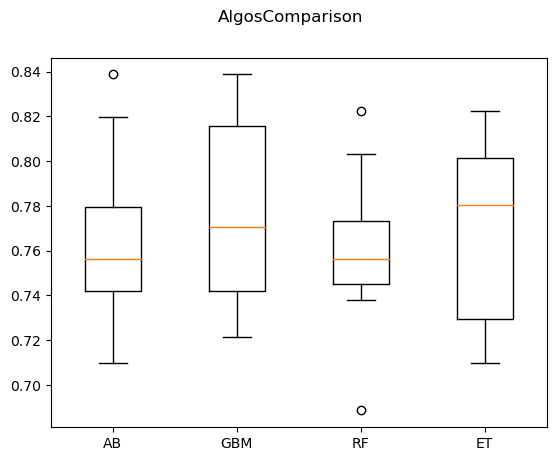

In [18]:
#viz
fig = plt.figure()
fig.suptitle('AlgosComparison')
ax = fig.add_subplot(111)
plt.boxplot(res_new)
ax.set_xticklabels(nms_1)
plt.show()